In [2]:
import pandas as pd

In [3]:
from kedro.framework.session import KedroSession
session = KedroSession.create(project_path="../")
context = session.load_context()
catalog = context.catalog

[04/09/25 12:09:26] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=37524;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=705477;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#65\65]8;;\

                    WARNING  No 'mlflow.yml' config file found in environment. Default            ]8;id=267581;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=748283;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#78\78]8;;\
                             configuration will be used. Use ``kedro mlflow init`` command in CLI                  
                             to customize the configuration.                                                       

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=211115;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=193121;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#293\293]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/Dell/Downloads/Engenharia_de_Machine_Lear                           
                             ning/python/kobe/mlruns'                                                              

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=312761;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=400367;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

In [5]:
raw_data = catalog.load("raw_prod")

[04/09/25 12:09:40] INFO     Loading data from raw_prod (ParquetDataset)...                     ]8;id=529248;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=468284;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

In [6]:
raw_data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
17,Jump Shot,Jump Shot,138,20000019,33.8183,-117,226,-118.3868,8,2,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,18
27,Jump Shot,Jump Shot,369,20000019,33.8583,-183,186,-118.4528,0,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,28
39,Jump Shot,Jump Shot,202,20000047,33.7723,-27,272,-118.2968,0,2,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,40
54,Jump Shot,Jump Shot,60,20000049,33.7973,-141,247,-118.4108,4,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,55


In [7]:
raw_data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,6426.000000,6.426000e+03,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,5412.000000,6.426000e+03,6426.000000
mean,281.746032,2.450391e+07,33.849664,5.987084,194.635543,-118.263813,4.107688,2.704171,0.137255,26.880019,25.581855,0.329268,1.610613e+09,16062.382353
std,151.143268,7.514467e+06,0.082910,157.617034,82.909851,0.157617,3.449276,1.149971,0.344143,17.732805,4.067015,0.469991,0.000000e+00,8237.432519
min,2.000000,2.000001e+07,33.253300,-250.000000,-35.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,11.000000
25%,164.000000,2.050084e+07,33.805300,-152.000000,167.000000,-118.421800,1.000000,2.000000,0.000000,11.000000,24.000000,0.000000,1.610613e+09,8983.750000
50%,291.000000,2.090113e+07,33.835300,12.000000,209.000000,-118.257800,4.000000,3.000000,0.000000,27.000000,25.000000,0.000000,1.610613e+09,16373.000000
75%,408.000000,2.150085e+07,33.877300,154.000000,239.000000,-118.115800,7.000000,4.000000,0.000000,42.000000,26.000000,1.000000,1.610613e+09,22598.750000
max,634.000000,4.990009e+07,34.079300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30696.000000


In [8]:
raw_data = raw_data.dropna()

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5412 entries, 10 to 30695
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         5412 non-null   object 
 1   combined_shot_type  5412 non-null   object 
 2   game_event_id       5412 non-null   int64  
 3   game_id             5412 non-null   int64  
 4   lat                 5412 non-null   float64
 5   loc_x               5412 non-null   int64  
 6   loc_y               5412 non-null   int64  
 7   lon                 5412 non-null   float64
 8   minutes_remaining   5412 non-null   int64  
 9   period              5412 non-null   int64  
 10  playoffs            5412 non-null   int64  
 11  season              5412 non-null   object 
 12  seconds_remaining   5412 non-null   int64  
 13  shot_distance       5412 non-null   int64  
 14  shot_made_flag      5412 non-null   float64
 15  shot_type           5412 non-null   object 
 16  shot_zone

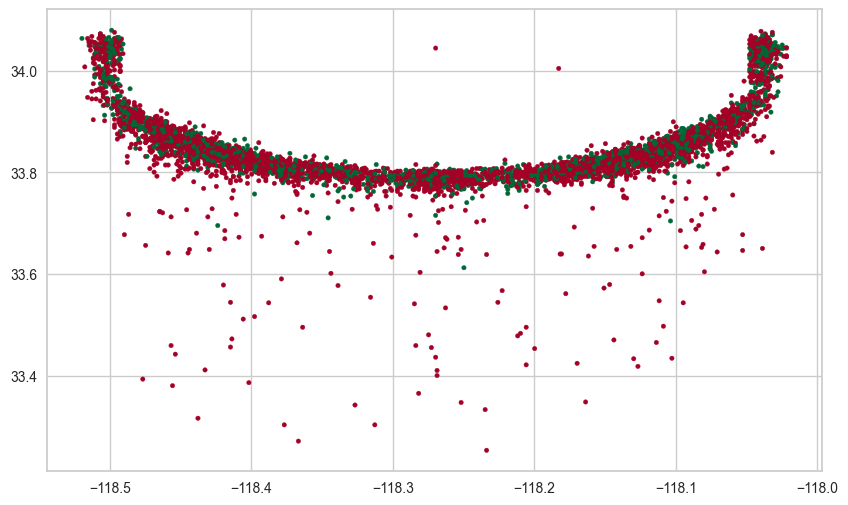

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#plot predictions with x and y being lat and lon
plt.scatter(raw_data['lon'], raw_data['lat'], c=raw_data['shot_made_flag'], cmap='RdYlGn', s=10)

In [11]:
prod = raw_data[['lat','lon','minutes_remaining','period','playoffs','shot_distance']]#,'shot_made_flag']]
prod.head()

,lat,lon,minutes_remaining,period,playoffs,shot_distance
10,33.8063,-118.3638,1,3,0,25
17,33.8183,-118.3868,8,2,0,25
27,33.8583,-118.4528,0,3,0,26
39,33.7723,-118.2968,0,2,0,27
55,33.8503,-118.4248,2,1,0,24


In [12]:
import mlflow.pyfunc

# Load the model
model_uri = "runs://uns:/4fc7f9e665f84f838e62031857300561/model"  
loaded_model = mlflow.pyfunc.load_model(model_uri)

# Test the model
test_data = prod
predictions = loaded_model.predict(test_data)

# Print predictions
print(predictions)

[0. 0. 1. ... 0. 0. 0.]


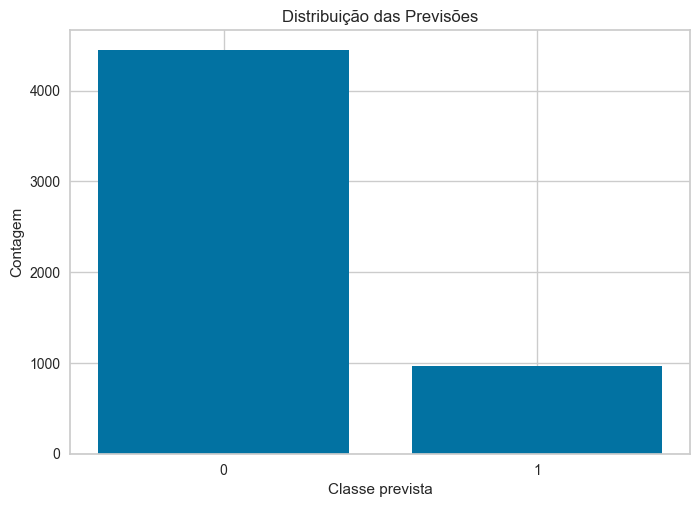

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(predictions, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Classe prevista')
plt.ylabel('Contagem')
plt.title('Distribuição das Previsões')
plt.show()

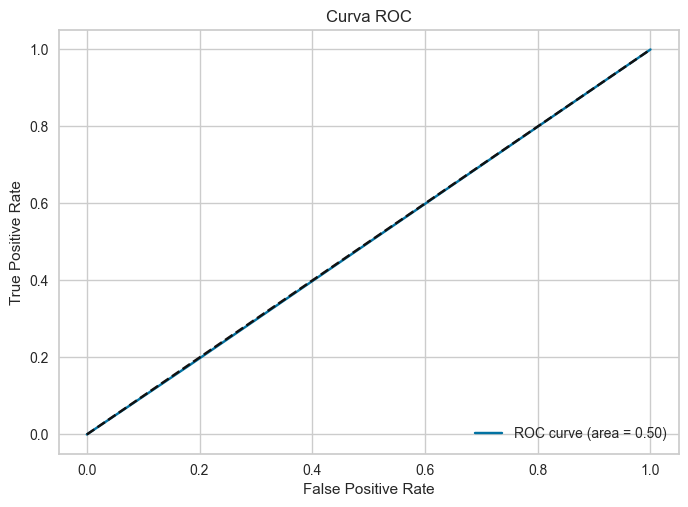

In [14]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(raw_data['shot_made_flag'], predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

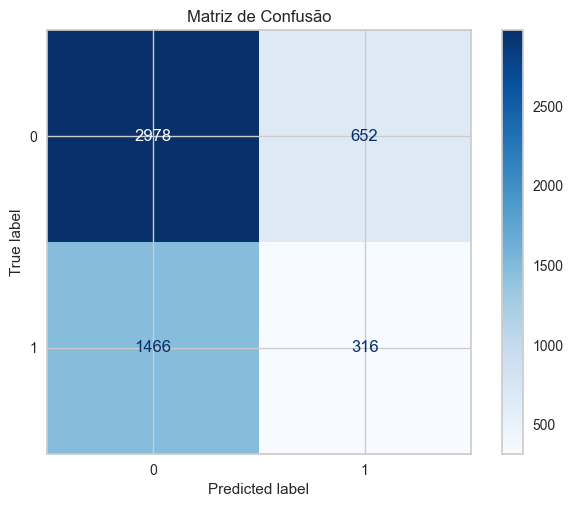

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(raw_data['shot_made_flag'], predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

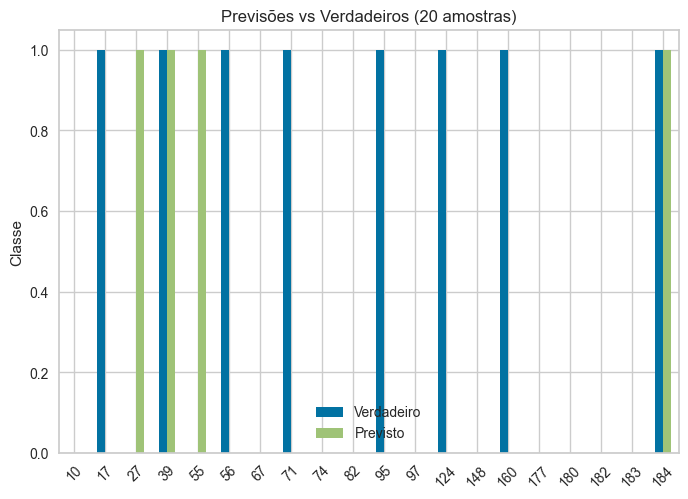

In [16]:
import pandas as pd

df_resultado = pd.DataFrame({'Verdadeiro': raw_data['shot_made_flag'][:20], 'Previsto': predictions[:20]})
df_resultado.plot(kind='bar')
plt.title('Previsões vs Verdadeiros (20 amostras)')
plt.ylabel('Classe')
plt.xticks(rotation=45)
plt.show()